The Lecture Codes below are created or modified Code References below.

Code Reference 1: Al Sweigart, Making Games with Python & Pygame. Createspace Independent Pub, 2012.
Code Reference 2: Penny de Byl, Mathematics for Game Programming and Computer Graphics. Packt Programming, 2022. 
Code Reference 3: Paul Orland, Math for Programmers - 3D graphics, machine learning, and simulations with Python. Manning, 2020.

## Picturing 2D Vectors

In [6]:
%load_ext autoreload
%autoreload 2
from vector_drawing import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


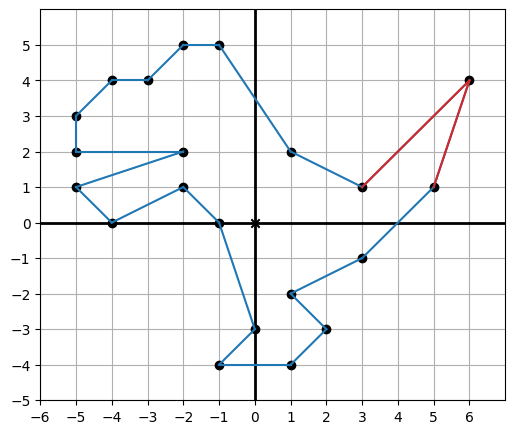

In [9]:
dino_vectors = [(6,4), (3,1), (1,2), (-1,5), (-2,5), (-3,4), (-4,4),
    (-5,3), (-5,2), (-2,2), (-5,1), (-4,0), (-2,1), (-1,0), (0,-3),
    (-1,-4), (1,-4), (2,-3), (1,-2), (3,-1), (5,1)
]

draw(
    Points(*dino_vectors),  # *의 의미는 다이노 벡터의 20개의 점이있는데 draw함수에 리스트를 언패킹해서 여러 인자값으로 넣었다고 생각하면된다.
    Polygon(*dino_vectors), # 1주차에 나눠줬던 강의 코드 참고 draw((a,b)) 일때도 되고 draw((a,b),(c,d)) 일때도 되고싶다!! 이럴 때 사용
    Segment((6,4),(3,1), color=red),
    Segment((5,1),(6,4), color=red),
)


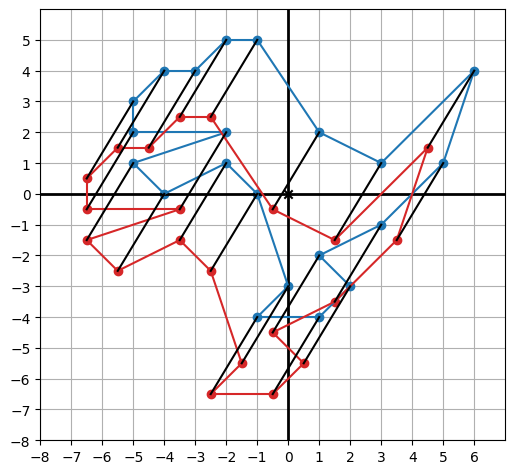

In [20]:
def add(v1,v2):
    return (v1[0] + v2[0], v1[1] + v2[1]) # 벡터 합을 통한 평행이동

dino_vectors2 = [add((-1.5,-2.5), v) for v in dino_vectors]

arrows = [Segment(tip,tail,color=black) for (tip,tail) in
         zip(dino_vectors2, dino_vectors)]

draw(
    Points(*dino_vectors, color=blue),
    Polygon(*dino_vectors, color=blue),
    Points(*dino_vectors2, color=red),
    Polygon(*dino_vectors2, color=red), 
    *arrows
)

**EXERCISE 1** Draw the vectors `y=x^2+10` as points (dots) using the draw function.
Please use List Expression!

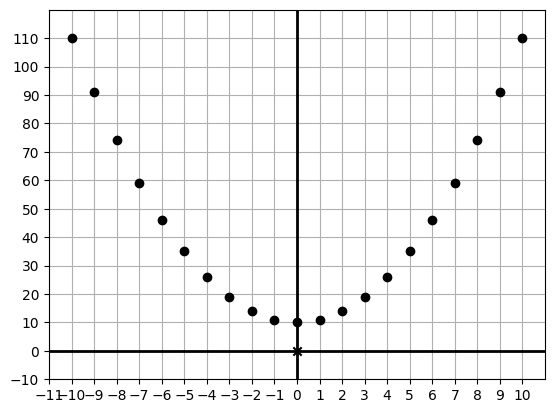

In [26]:
draw(
#####  
    Points(*[(i, i**2 + 10) for i in range(-10, 11)]),
##### 
    grid=(1,10),
    nice_aspect_ratio=False # don't require x scale to match y scale
)


## Vector Operations: addition, subtraction, displacement, and distance

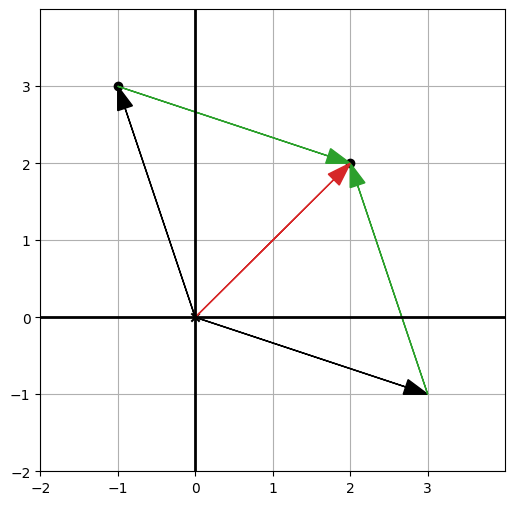

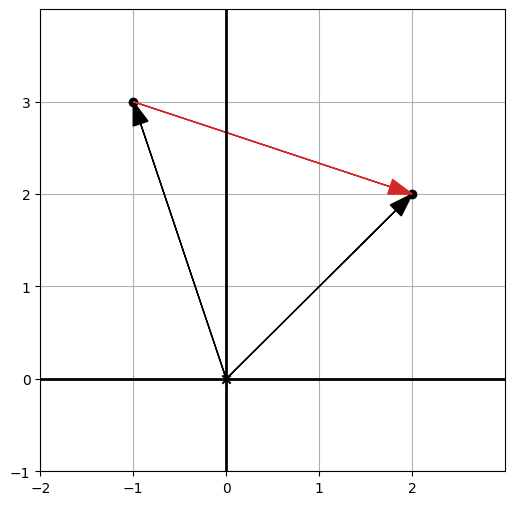

In [76]:
ORIGIN = (0,0)

# vector addition
draw(
    Points((2,2), (-1,3)),
    Arrow((-1,3), ORIGIN, color=black),
    Arrow((3,-1), ORIGIN, color=black),

    Arrow((2,2), (3,-1),  color=green),
    Arrow((2,2), (-1,3), color=green),

    Arrow((2,2), ORIGIN, color=red),    
)

# subtraction
draw(
    Points((2,2), (-1,3)),
    Arrow((-1,3), ORIGIN, color=black),
    # Arrow(ORIGIN, (-1,3), color=green),
    Arrow((2,2), ORIGIN, color=black),
    Arrow((2,2), (-1,3), color=red)
)

**EXERCISE 2:** You can add any number of vectors together by summing all of their $x$-coordinates and all of their $y$-coordinates.  For instance the four-fold sum (1,2) + (2,4) + (3,6) + (4,8) has $x$-component 1 + 2 + 3 + 4 = 10 and $y$-component 2 + 4 + 6 + 8 = 20, making the result (10,20).  Implement a revised add function that takes any number of vectors as arguments.

**EXERCISE 3:** Write a function to compute the size of a vector & the scalar mulitplication



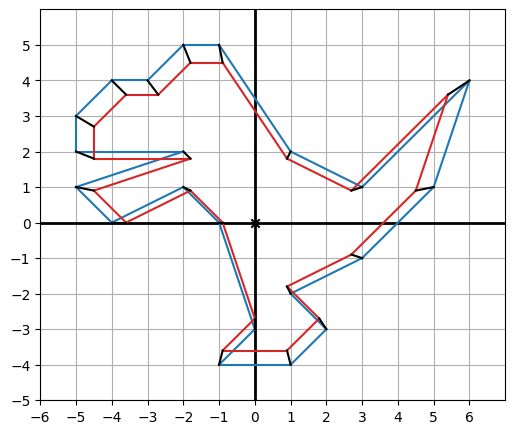

In [28]:
from math import sqrt
def add(*vectors):
#####
    return (sum([v[0] for v in vectors]), sum([v[1] for v in vectors]))
#####
    
def length(v):
#####
    return sqrt(v[0]**2 + v[1]**2)
#####
def scale(scalar,v):
#####
    return(scalar * v[0], scalar * v[1])
#####
dino_vectors3 = [scale(0.9,vec) for vec in dino_vectors]

arrows = [Segment(tip,tail,color=black) for (tip,tail) in
         zip(dino_vectors3, dino_vectors)]

draw(
    Polygon(*dino_vectors, color=blue),
    Polygon(*dino_vectors3, color=red),    
    *arrows
)

(4.442882938158366, 5.441398092702653)


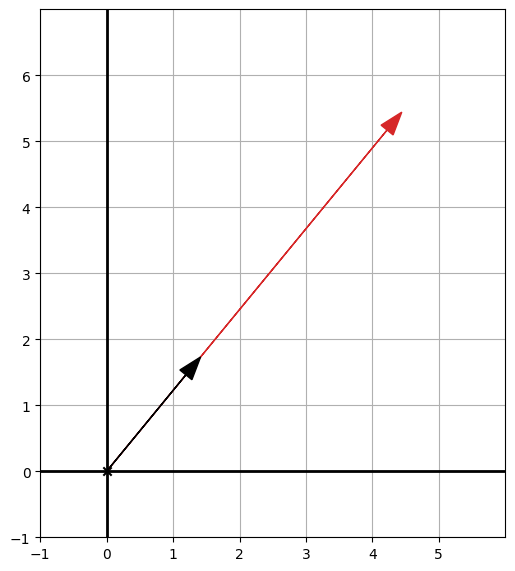

In [90]:
from math import sqrt, pi

w = (sqrt(2),sqrt(3))
w_scaled = (pi * sqrt(2), pi * sqrt(3))

print(w_scaled)

draw(
    Arrow(w_scaled, color=red),
    Arrow(w, color=black)
)

**EXERCISE 4:** Write a function to compute the unit vector of a vector & Display the result

**Self Study:** Write a Python function using vector addition to show 100 simultaneous and non-overlapping copies of the dinosaur.  This shows the power of computer graphics: imagine how tedious it would be to specify all 2,100 coordinate pairs by hand!

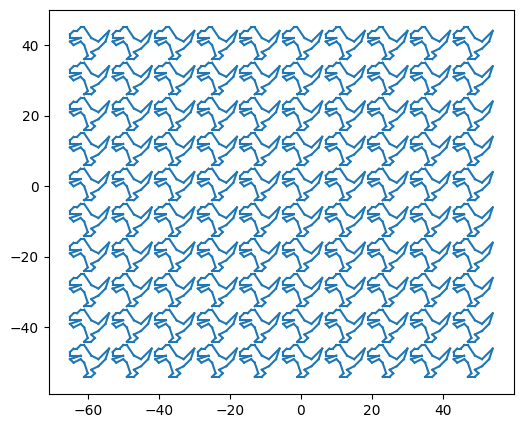

In [85]:
from vectors import *

def hundred_dinos():
    translations = [(12*x,10*y) 
                    for x in range(-5,5) 
                    for y in range(-5,5)]
    dinos = [Polygon(*translate(t, dino_vectors),color=blue)
                for t in translations]
    draw(*dinos, grid=None, axes=None, origin=None)

hundred_dinos()

**Self Study:** Suppose $\vec{u} = (-1,1)$ and $\vec{v} = (1,1)$ and suppose $r$ and $s$ are real numbers.  Specifically, let’s assume $-1 < r < 1$ and $-3 < s < 3$.  

Where are the possible points on the plane where the vector $r \cdot \vec{u} + s \cdot \vec{v}$ could end up?  

Note: the order of operations is the same for vectors as it is for numbers: we assume scalar multiplication is carried out first, and then vector addition (unless parentheses specify otherwise).

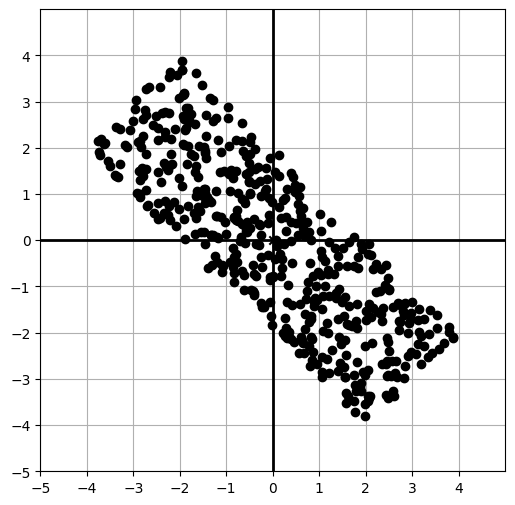

In [107]:
from random import uniform

u = (-1,1)
v = (1,1)
def random_r():
    return uniform(-3,3)
def random_s(): 
    return uniform(-1,1)

possibilities = [add(scale(random_r(), u), scale(random_s(), v)) 
                 for i in range(0,500)]
draw(
    Points(*possibilities)
)